# Flight Price Prediction
---

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Importing dataset

In [32]:
train_data = pd.read_excel(r"C:\Users\HP\Downloads\ML Project\Data_Train.xlsx")

In [33]:
train_data.shape

(10683, 11)

In [34]:
train_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [35]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [36]:
train_data.dropna(inplace = True)#row wise

In [37]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

---

# From description we can see that Date_of_Journey is a object data type

In [38]:
train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [39]:
train_data["Journey_month"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [40]:
train_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5


In [41]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [42]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

# Extracting Minutes
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_4664\569228883.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour
C:\Users\HP\AppData\Local\Temp\ipykernel_4664\569228883.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute


In [43]:
#train_data.head()

In [44]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour

# Extracting Minutes
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_4664\1117634591.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour
C:\Users\HP\AppData\Local\Temp\ipykernel_4664\1117634591.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute


In [45]:
train_data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15


In [46]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [47]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [48]:
train_data.drop(["Duration"], axis = 1, inplace = True)

---

## Handling Categorical Data

One can find many ways to handle categorical data. Some of them categorical data are,
1. Nominal data--> data are not in any order --> OneHotEncoder
2. Ordinal data --> data are in order --> LabelEncoder

In [49]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = train_data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head(2)

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False


D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


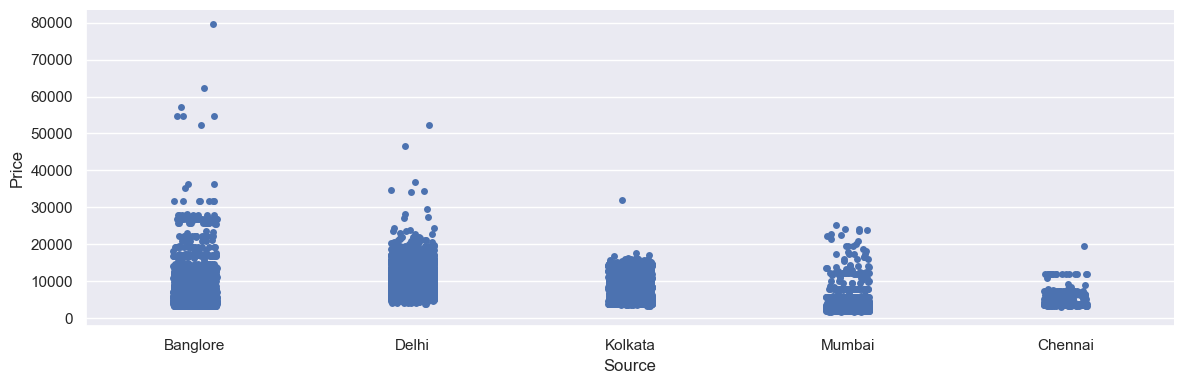

In [50]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), height = 4, aspect = 3)
plt.show()

In [51]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = train_data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head(2)

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,False,False,False,False
1,False,False,True,False


In [52]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = train_data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head(2)

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,False,False,False,False,True
1,False,False,False,False,False


In [53]:
#train_data["Route"]

In [54]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

train_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [55]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

#for total stops

train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [56]:
train_data.head(2)

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25


In [57]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)

In [58]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [59]:
#data_train.head()

---

## Feature Selection

Finding out the best feature which will contribute and have good relation with target variable.
Following are some of the feature selection methods,




In [60]:
#This is train data and has price column we need to exclude it
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [61]:
#price column is excluded
X = data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head(2)

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1,5,5,50,13,15,7,25,True,...,False,False,False,True,False,False,False,False,False,False


In [62]:
#this is the price column our target
y = data_train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

# End of EDA ,Now we will start model building and prediction 

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [64]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [65]:
y_pred = reg_rf.predict(X_test)

In [66]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
#print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1184.1478216085247
RMSE: 2101.0257987562204


In [67]:
metrics.r2_score(y_test, y_pred)

0.7952741918175645

In [68]:
from sklearn.model_selection import RandomizedSearchCV

In [69]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 50, num = 6)]
max_depth.append(None)                                     #value can be cahnged ,by code=30
#criterion={"squared_error", "absolute_error", "poisson"},
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

bootstrap = [True, False]

In [70]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               #"criterion":criterion,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                "bootstrap":bootstrap}

In [71]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations  

#n_iter = 100, cv = 10 ,u can
rf_randomRFG = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1,
                               error_score="raise")

In [72]:
import warnings
warnings.filterwarnings("ignore") 

In [74]:
rf_randomRFG.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


InvalidParameterError: The 'max_features' parameter of RandomForestRegressor must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.

In [ ]:
"""{'n_estimators': 700,
 'min_samples_split': 100,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 41,
 'bootstrap': False}"""

In [ ]:
rf_randomRFG.best_params_


In [ ]:
y_predictionRFG = rf_randomRFG.predict(X_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predictionRFG))

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predictionRFG)))

In [ ]:
metrics.r2_score(y_test,y_predictionRFG)

In [ ]:
from sklearn.model_selection import GridSearchCV


n_estimators = [700]
max_features = ['auto', 'sqrt']
max_depth = [41]
#max_depth.append(None)                                   
criterion=["squared_error", "absolute_error", "friedman_mse", "poisson"]
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
bootstrap = [True, False]


# Define the parameter grid for the grid search
# Create the random grid

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               "criterion":criterion,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                "bootstrap":bootstrap}

# Perform the grid search
CV_rfc =  GridSearchCV(reg_rf,param_grid=param_grid, cv=2,verbose=2,n_jobs=-1)
CV_rfc.fit(X_train, y_train)

# Print the best estimator
print('Best estimator:', CV_rfc.best_estimator_)


In [ ]:

CV_rfc.best_params_

"""{'bootstrap': True,
 'criterion': 'friedman_mse',
 'max_depth': 41,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 700}"""

In [ ]:
y_predGrid=CV_rfc.predict(X_test)

In [ ]:
metrics.r2_score(y_test,y_predGrid)

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_predGrid))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predGrid)))

# LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear=LinearRegression()

In [ ]:
linear.fit(X_train,y_train)

In [ ]:
y_pred=linear.predict(X_test)

In [ ]:
metrics.r2_score(y_test,y_pred)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
#print('MSE:', metrics.mean_squared_error(y_test, y_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# KNeighborsRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
clf = KNeighborsRegressor(n_neighbors = 5) 
clf.fit(X_train, y_train) 

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
training_score = clf.score(X_train, y_train) 

In [ ]:
metrics.r2_score(y_test,y_pred)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
#print('MSE:', metrics.mean_squared_error(y_test, y_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
model = KNeighborsRegressor()

In [ ]:
# Define the hyperparameters to tune
hyperparameters = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
                   'weights': ['uniform', 'distance'],
                   'algorithm':[ 'ball_tree', 'kd_tree', 'brute'],
                   "leaf_size":[x for x in np.linspace(stop=25,start=50,num=15)],
                   'p': [1, 2, 5]}

In [ ]:

rf_random = RandomizedSearchCV(estimator = clf, param_distributions = hyperparameters,
  scoring='neg_mean_squared_error', n_iter = 30, cv = 5, verbose=2, random_state=42, n_jobs =-1)

In [ ]:
clf

In [ ]:
rf_random.fit(X_train,y_train)

In [ ]:
"""{'weights': 'distance',
 'p': 1,
 'n_neighbors': 4,
 'leaf_size': 33.92857142857143,
 'algorithm': 'ball_tree'}"""
rf_random.best_params_

In [ ]:
y_pred=rf_random.predict(X_test)

In [ ]:
metrics.r2_score(y_pred,y_test)
#0.5386360073668998

gridsearchcv for Kneighbour

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the model
model = KNeighborsRegressor()


In [ ]:
# Define the hyperparameters to tune
hyperparameters = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
                   'weights': ['distance'],
                   'algorithm':[ 'ball_tree'],
                   "leaf_size":[x for x in np.linspace(stop=25,start=50,num=15)],
                   'p': [1, 2, 5]}

In [ ]:
 # Print the best hyperparameters and score
#print('Best hyperparameters:', grid.best_params_)

In [ ]:
# Tune the model using GridSearchCV
gridknei = GridSearchCV(model,param_grid=hyperparameters, cv=10,verbose=2,n_jobs=-1)

In [ ]:
gridknei.fit(X_train,y_train)

In [ ]:
y_pred=gridknei.predict(X_test)

In [ ]:

gridknei.best_params_

In [ ]:
metrics.r2_score(y_test,y_pred)

In [ ]:
"""model = KNeighborsRegressor(algorithm ='ball_tree',
 leaf_size= 50.0,
 n_neighbors= 6,
 p= 1,
)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)"""

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
#print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
grad=GradientBoostingRegressor()

In [ ]:
grad.fit(X_train,y_train)

In [ ]:
y_pred=grad.predict(X_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
metrics.r2_score(y_test,y_pred)

In [ ]:
#from sklearn.ensemble import GradientBoostingRegressor
#from sklearn.model_selection import GridSearchCV



# Define the model
model = GradientBoostingRegressor()

# Define the hyperparameters to tune
hyperparameters = {'n_estimators': [100,200,500,700,1000],
                   'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
                   'max_depth': [3, 5, 7,9,12],
                   'learning_rate': [0.01, 0.1,0.2,0.3,0.4 ,0.5],
                    'criterion':['friedman_mse', 'squared_error']}

# Tune the model using GridSearchCV
#grid = GridSearchCV(model,, hyperparameters, cv=5)
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations  

#n_iter = 100, cv = 10 ,u can
grid_after_cv= RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', 
                               n_iter = 30, cv = 5, verbose=2, random_state=42, n_jobs = -1)





In [ ]:
grid_after_cv.fit(X_train,y_train)

In [ ]:
# Print the best hyperparameters and score


"""Best hyperparameters: {'n_estimators': 400, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}"""




In [ ]:
print('Best hyperparameters:', grid_after_cv.best_params_)

In [ ]:
y_pred_GBRegressor=grid_after_cv.predict(X_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_GBRegressor))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_GBRegressor))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_GBRegressor)))

In [ ]:
r2_score=metrics.r2_score(y_test,y_pred_GBRegressor)
print(r2_score)

# doing grid serach cv

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define the hyperparameters to tune
hyperparameters = {'n_estimators': [400],
                   'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
                   'max_depth': [3, 5,9,12],
                   'learning_rate': [0.01,0.2,0.3,0.4 ,0.5],
                    'criterion':['friedman_mse', 'squared_error']}

In [ ]:
model_for_GrBRegressor=GradientBoostingRegressor()

In [ ]:
grid_GridSearchCV= GridSearchCV(model_for_GrBRegressor,param_grid=hyperparameters, cv=2,verbose=2,n_jobs=-1)

In [ ]:
grid_GridSearchCV.fit(X_train,y_train)

In [ ]:
"""{'criterion': 'friedman_mse',
 'learning_rate': 0.3,
 'loss': 'huber',
 'max_depth': 3,
 'n_estimators': 400}"""

In [ ]:
grid_GridSearchCV.best_params_

In [ ]:
y_predGBR=grid_GridSearchCV.predict(X_test)

In [ ]:
y_predGBR

In [ ]:
from sklearn.metrics import r2_score
r2_scor=r2_score(y_test,y_predGBR)
print(r2_scor)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predGBR))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predGBR)))

In [ ]:
X_test.head()

In [ ]:
y_test

In [ ]:
y_predGBR

# Comparison of models

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 

X = ['GradientBoostingRegressor','KNeighborsRegressor','RandomForestRegressor','LinearRegression'] 
r2_score = [84,64,81,61] 
MAE = [1218,1689,1145,1972] 
RMSE=[1838,2721,2009,2863]

X_axis = np.arange(len(X)) 

bar_width = 0.2
plt.figure(figsize=(12,6))
bar1 = plt.bar(X_axis - bar_width, r2_score, bar_width, label = 'r2_score') 
bar2 = plt.bar(X_axis, MAE, bar_width, label = 'MAE') 
bar3 = plt.bar(X_axis + bar_width, RMSE, bar_width, label = 'RMSE')

plt.xticks(X_axis, X) 
plt.xlabel("Algorithm") 
plt.ylabel("Values") 

# Adding the text labels at the top of each bar
for bar in bar1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom') # va: vertical alignment y positional argument

for bar in bar2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom')

for bar in bar3:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom')

#plt.title("Number of Students in each group") 
#plt.grid()
plt.legend() 
plt.show()
